<a href="https://colab.research.google.com/github/Said-Akbar/Data-science/blob/master/linear_multi_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression with gradient descent 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Linear regression is done in few steps if one is familiar with linear algebra. In this notebook, I performed linear regression using numpy and pandas library. There is only one part where I use LinearRegression from sklearn only to compare my thetas with sklearn's predicted thetas. The dataset is from Andrew Ng's Machine Learning MOOC, exercise on linear regression. 

In [0]:
# Single variable regression

In [0]:
# load dataset and do not accept the first row as column name, then set column names as X, y
ex1 = pd.read_csv('ex1data1.txt', header=None, names=['X', 'y'])

In [0]:
ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
X    97 non-null float64
y    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


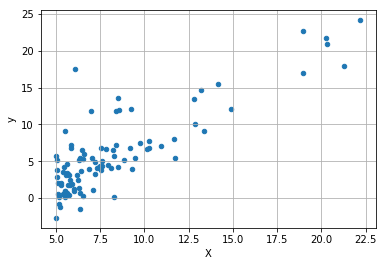

In [0]:
ex1.plot('X', 'y', kind='scatter', grid=True) # check the graph of the dataset

In [0]:
y = np.array(ex1['y'], dtype=np.float64)
X = np.array(ex1['X'], dtype=np.float64)
X=np.c_[np.ones(X.size),X] # ones and X's for calculating y_hat, concatenate by (columns) the second axis
y = np.array(y, dtype=np.float64).reshape(len(y),1)

In [0]:
def cost_func(X,y,theta=[[0],[0]]):
  m = y.size
  h = X.dot(theta)
  J = (1/(2*m))*np.sum(np.square(h-y)) # cost J for this particular set of thetas
  return J
  

In [0]:
cost_func(X,y)

32.072733877455676

In [0]:
def grad_desc(X, y, theta=[[0],[0]], alpha = 0.01,iters=4000): #changing alpha to 0.03 will diverge the gradient from minimum
  m = y.size
  theta = np.array(theta, dtype=np.float64)
  alpha = np.array(alpha, dtype=np.float64)
  J_hist = []
  parm=alpha * (1/m)
  #print(parm)
  for iternt in range(iters):
    h=X.dot(theta)
    theta = theta - parm * (X.T.dot(h-y)) # here is what happens: X (97,2) transpose becomes (2,97); then h-y gives errors with (97,1); 
    #multiply X.T by errors, you get (2,1) matrix, then each multiplied by alpha/m
    J_hist.append(cost_func(X, y, theta))
  return theta, J_hist
    


In [0]:
#this is an example of what happens if the learning rate is too high.
theta=[[0],[0]]
parm = 0.03 *1/97
thetas = []
costs=[]
for i in range(40):
  h=X.dot(theta)
  
  theta=theta - parm* (X.T.dot(h-y))
  thetas.append(theta)
  costs.append(cost_func(X, y, theta))
#print(theta)
print(thetas[-1])
print(costs)

[[ -359255.0738483 ]
 [-3576062.73711431]]
[62.170089597848055, 126.93475010623585, 266.27689783649186, 566.0529030780227, 1210.960398676191, 2598.3282637417014, 5582.906152087819, 12003.465439687388, 25815.644079732458, 55528.967409057346, 119449.46401421532, 256957.7890231618, 552771.1704754743, 1189136.6711308532, 2558111.404435414, 5503104.190678219, 11838489.552713841, 25467421.963190373, 54786522.21095106, 117858934.13662298, 253542809.56250706, 545431346.6808704, 1173353550.637582, 2524164713.3832316, 5430083290.382117, 11681410647.613314, 25129514127.367218, 54059607988.6125, 116295173924.00833, 250178793032.73053, 538194547308.2763, 1157785467117.1145, 2490674040782.7305, 5358036832923.844, 11526421455761.678, 24796095233892.26, 53342344040439.16, 114752167262188.02, 246859415877689.72, 531053771457222.7]


[[-3.89286253]
 [ 1.19274046]]


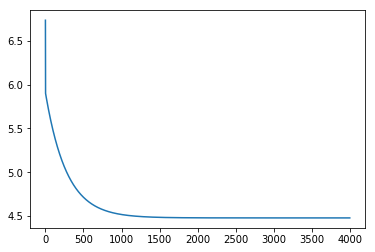

In [0]:
theta, cost = grad_desc(X,y)
print(theta)
plt.plot(cost)

 Theta0 (intercept) is -3.89286 and theta1 is 1.1927 with our gradient descent estimate.

As we can see from above graph, gradient descent function is decreasing the cost of the function. Eventually, it reaches the point where there is no decrease in the cost. That is the point in which we obtain estimated thetas.
Next, we use LinearRegression from sklearn to compare thetas.

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr=LinearRegression()

In [0]:
lr.fit(np.array(ex1['X']).reshape(len(X),1),np.array(ex1['y']).reshape(len(y),1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print(lr.intercept_ , lr.coef_)

[-3.89578088] [[1.19303364]]


This is great! The estimated thetas with sklearn method is almost the same as our estimates (Theta0 (intercept) is -3.893 and theta1 is 1.1927).  

#Multivariate regression

In [0]:
ex2 = pd.read_csv('ex1data2.txt', header=None, names=['X1', 'X2',  'y'])

In [0]:
ex2.head()

,X1,X2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [0]:
ex2 = ex2.astype('float64')

In [0]:
y = ex2['y']
X1 = ex2['X1']
X2 = ex2['X2']
# normalizing the dataset so that our gradient descent works without memory limitations
stdx1 = np.std(X1)
meanx1= X1.mean()

X1 = (X1 - meanx1)/stdx1

stdx2 = np.std(X2)
meanx2= X2.mean()
X2 = (X2 - meanx2)/stdx2

X=np.c_[np.ones(X1.size),X1, X2]

y = np.array(y).reshape(len(y),1)

In [0]:
def cost_func(X,y,theta=[[0],[0], [0]]):
  m = y.size
  h = X.dot(theta)
  J = (1/(2*m))*np.sum(np.square(h-y)) # cost J for this particular set of thetas
  return J
  

In [0]:
cost_func(X,y)

65591548106.45744

In [0]:
def grad_desc(X, y, theta=[[0],[0], [0]], alpha = 0.01,iters=1500): #changing alpha to 0.03 will diverge the gradient from minimum
  m = y.size
  theta = np.array(theta, dtype=np.float64)
  alpha = np.array(alpha, dtype=np.float64)
  J_hist = []
  parm=alpha * (1/m)
  #print(parm)
  for iternt in range(iters):
    h=X.dot(theta)
    theta = theta - parm * (X.T.dot(h-y)) # here is what happens: X (97,2) transpose becomes (2,97); then h-y gives errors with (97,1); 
    #multiply X.T by errors, you get (2,1) matrix, then each multiplied by alpha/m
    cc = cost_func(X, y, theta)
    #print(cc)
    J_hist.append(cc)
  return theta, J_hist, cc

In [0]:
theta,_,_=grad_desc(X,y, alpha=0.1)

In [0]:
theta

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])

Our estimated thetas are shown above. Below, we estimate those thetas using sklearn. As we can see, the estimated thetas are the same in both cases.

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.c_[X1, X2],np.array(ex2['y']).reshape(len(y),1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print(lr.intercept_)
print(lr.coef_)

[340412.65957447]
[[109447.79646964  -6578.35485416]]
